In [42]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

kmax = 20
lamb = 0.3
rho = 1/4
vax_rate = .40
N = 100
S_0 = N//2
I_0 = N - S_0

def calc_I_v(I_v, lamb, k , vax_rate, rho, theta):
    pk = rho*(1-rho)**k
    return (lamb*theta*k*(1-rho)*(vax_rate*pk - I_v) - I_v)

def calc_I_u(I_u, lamb, k , vax_rate, rho, theta):
    pk = rho*(1-rho)**k
    return  (lamb*theta*k*((1-vax_rate)*pk- I_u)- I_u)

def SIS_net(w, t, p):
    ## https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html
    lamb, vax_rate, rho, kmax = p
    theta = ((sum_k_Ivk + sum_k_Iuk)/sum_k_Nk)

    ## loop here that iterates through all k, 4 states for each, updates dt
    
    f = [
         (lamb*theta*k*(1-rho)*(vax_rate*pk - I_v) - I_v),
         (lamb*theta*k*((1-vax_rate)*pk- I_u)- I_u)]

    return f

w0 = [.1, .7]
p = [lamb, 3, vax_rate, rho,  250, 500, 1000]
numpoints = 1000
stoptime = 10.0
abserr = 1.0e-8
relerr = 1.0e-6
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

wsol = odeint(SIS_net, w0, t, args=(p,))

#sol1 = solve_ivp(func, t_span, y0)

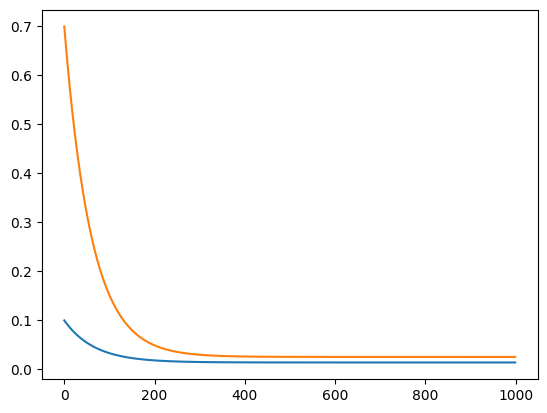

In [43]:
import matplotlib.pyplot as plt

plt.plot(wsol)